In [135]:
import numpy as np
import scipy
import scipy.misc
import scipy.ndimage
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

import resource


np.set_printoptions(suppress=True, precision=5)



%matplotlib inline

In [2]:
class Laptimer:    
    def __init__(self):
        self.start = datetime.now()
        self.lap = 0
        
    def click(self, message):
        td = datetime.now() - self.start
        td = (td.days*86400000 + td.seconds*1000 + td.microseconds / 1000) / 1000
        memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / (1024 ** 2)
        print("[%d] %s, %.2fs, memory: %dmb" % (self.lap, message, td, memory))
        self.start = datetime.now()
        self.lap = self.lap + 1
        return td
        
    def reset(self):
        self.__init__()
    
    def __call__(self, message = None):
        return self.click(message)
        
timer = Laptimer()
timer()

[0] None, 0.00s, memory: 89mb


7.7e-05

In [3]:
def normalize_fetures(X):
    return X * 0.98 / 255 + 0.01

def normalize_labels(y):
    y = OneHotEncoder(sparse=False).fit_transform(y)
    y[y == 0] = 0.01
    y[y == 1] = 0.99
    return y

In [4]:
url = "https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv"
train = pd.read_csv(url, header=None, dtype="float64")
train.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
61,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train = normalize_fetures(train.iloc[:, 1:].values)
y_train = train.iloc[:, [0]].values.astype("int32")
y_train_ohe = normalize_labels(y_train)

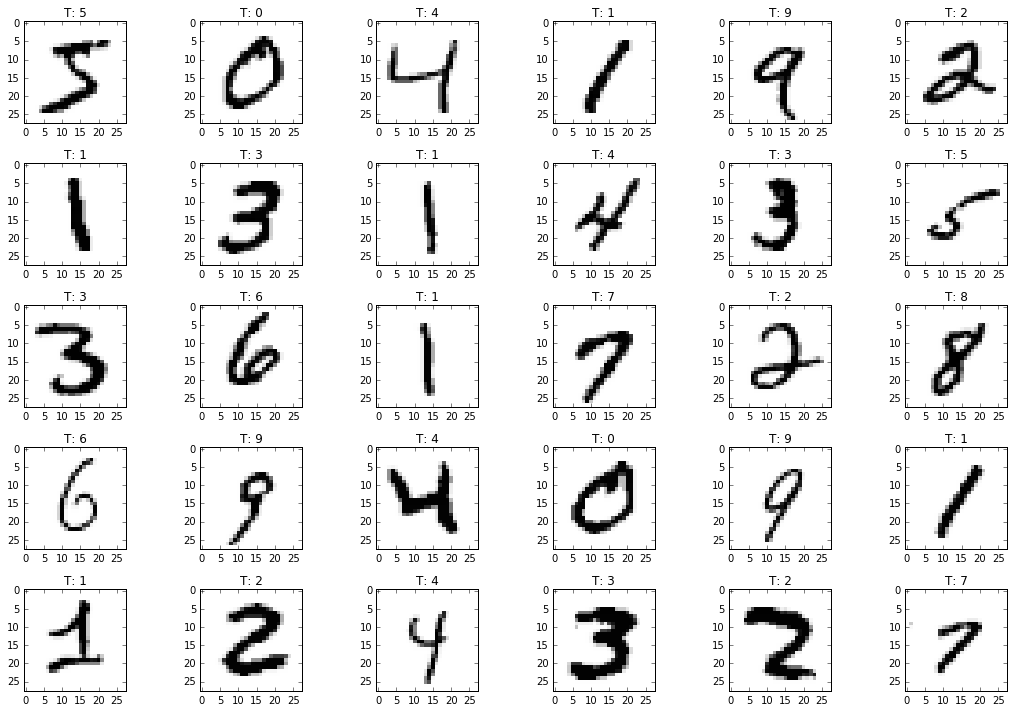

In [6]:
fig, _ = plt.subplots(5, 6, figsize = (15, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="Greys", interpolation="none")
    ax.set_title("T: %d" % y_train[i])

plt.tight_layout()

In [7]:
url = "https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_test_10.csv"
test = pd.read_csv(url, header=None, dtype="float64")
test.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_test = normalize_fetures(test.iloc[:, 1:].values)
y_test = test.iloc[:, 0].values.astype("int32")

# Neural Networks Classifier

Author: Abul Basar

In [9]:
class NeuralNetwork:

    def __init__(self, layers, learning_rate, random_state = None):
        self.layers_ = layers
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        self.hidden = layers[1:-1]
        self.learning_rate = learning_rate
        
        if not random_state:
            np.random.seed(random_state)
        
        self.W_sets = []
        for i in range(len(self.layers_) - 1):
            n_prev = layers[i]
            n_next = layers[i + 1]
            m = np.random.normal(0.0, pow(n_next, -0.5), (n_next, n_prev))
            self.W_sets.append(m)
    
    def activation_function(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, training, targets):
        inputs0 = inputs = np.array(training, ndmin=2).T
        assert inputs.shape[0] == self.num_features, \
                "no of features {0}, it must be {1}".format(inputs.shape[0], self.num_features)

        targets = np.array(targets, ndmin=2).T
        
        assert targets.shape[0] == self.num_classes, \
                "no of classes {0}, it must be {1}".format(targets.shape[0], self.num_classes)

        
        outputs  = []
        for i in range(len(self.layers_) - 1):
            W = self.W_sets[i]
            inputs = self.activation_function(W.dot(inputs))
            outputs.append(inputs)
        
        errors = [None] * (len(self.layers_) - 1)
        errors[-1] = targets - outputs[-1]
        #print("Last layer", targets.shape, outputs[-1].shape, errors[-1].shape)
        #print("Last layer", targets, outputs[-1])
        
        #Back propagation
        for i in range(len(self.layers_) - 1)[::-1]:
            W = self.W_sets[i]
            E = errors[i]
            O = outputs[i] 
            I = outputs[i - 1] if i > 0 else inputs0
            #print("i: ", i, ", E: ", E.shape, ", O:", O.shape, ", I: ", I.shape, ",W: ", W.shape)
            W += self.learning_rate * (E * O * (1 - O)).dot(I.T)
            if i > 0:
                errors[i-1] = W.T.dot(E)
        
    
    def predict(self, inputs, cls = False):
        inputs = np.array(inputs, ndmin=2).T        
        assert inputs.shape[0] == self.num_features, \
                "no of features {0}, it must be {1}".format(inputs.shape[0], self.num_features) 
        
        for i in range(len(self.layers_) - 1):
            W = self.W_sets[i]
            input_next = W.dot(inputs)
            inputs = activated = self.activation_function(input_next)
            
            
        return np.argmax(activated.T, axis=1) if cls else activated.T 
    
    def score(self, X_test, y_test):
        y_test = np.array(y_test).flatten()
        y_test_pred = nn.predict(X_test, cls=True)
        return np.sum(y_test_pred == y_test) / y_test.shape[0]




# Run neural net classifier on small dataset

### Training set size: 100, testing set size 10

In [10]:
nn = NeuralNetwork([784,100,10], 0.3, random_state=0)
for i in np.arange(X_train.shape[0]):
    nn.fit(X_train[i], y_train_ohe[i])
    
nn.predict(X_train[2]), nn.predict(X_train[2], cls=True)
print("Testing accuracy: ", nn.score(X_test, y_test), ", training accuracy: ", nn.score(X_train, y_train))
#list(zip(y_test_pred, y_test))

Testing accuracy:  0.6 , training accuracy:  0.85


# Load full MNIST dataset. 

### Training set size 60,000 and test set size 10,000

Original: http://yann.lecun.com/exdb/mnist/

CSV version: 
training: https://pjreddie.com/media/files/mnist_train.csv
testing: https://pjreddie.com/media/files/mnist_test.csv

In [11]:
train = pd.read_csv("../data/MNIST/mnist_train.csv", header=None, dtype="float64")
X_train = normalize_fetures(train.iloc[:, 1:].values)
y_train = train.iloc[:, [0]].values.astype("int32")
y_train_ohe = normalize_labels(y_train)
print(y_train.shape, y_train_ohe.shape)

test = pd.read_csv("../data/MNIST/mnist_test.csv", header=None, dtype="float64")
X_test = normalize_fetures(test.iloc[:, 1:].values)
y_test = test.iloc[:, 0].values.astype("int32")


(60000, 1) (60000, 10)


## Runt the Neural Network classifier and measure performance

In [12]:
timer.reset()
nn = NeuralNetwork([784,100,10], 0.3, random_state=0)
for i in range(X_train.shape[0]):
    nn.fit(X_train[i], y_train_ohe[i])
timer("training time")
accuracy = nn.score(X_test, y_test)
print("Testing accuracy: ", nn.score(X_test, y_test), ", Training accuracy: ", nn.score(X_train, y_train))

[0] training time, 23.18s, memory: 1263mb
Testing accuracy:  0.9285 , Training accuracy:  0.931516666667


# Effect of learning rate

[0] None, 23.22s, memory: 1583mb
[1] None, 23.83s, memory: 1583mb
[2] None, 24.14s, memory: 1583mb
[3] None, 23.72s, memory: 1583mb
[4] None, 23.85s, memory: 1583mb
[5] None, 23.08s, memory: 1583mb
[6] None, 23.78s, memory: 1583mb
[7] None, 23.26s, memory: 1583mb
[8] None, 23.69s, memory: 1583mb
[9] None, 23.20s, memory: 1583mb


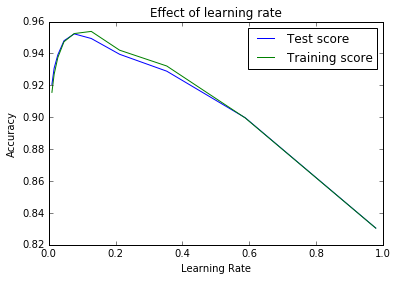

In [13]:
params = 10 ** - np.linspace(0.01, 2, 10)
scores_train = []
scores_test = []

timer.reset()
for p in params:
    nn = NeuralNetwork([784,100,10], p, random_state = 0)
    for i in range(X_train.shape[0]):
        nn.fit(X_train[i], y_train_ohe[i])
    scores_train.append(nn.score(X_train, y_train))
    scores_test.append(nn.score(X_test, y_test))
    timer()
    
plt.plot(params, scores_test, label = "Test score")
plt.plot(params, scores_train, label = "Training score")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of learning rate")

In [14]:
print("Accuracy scores")
pd.DataFrame({"learning_rate": params, "train": scores_train, "test": scores_test})

Accuracy scores


,learning_rate,test,train
0,0.977237,0.8305,0.830450
1,0.587339,0.8997,0.899567
2,0.353002,0.9289,0.932150
3,0.212162,0.9395,0.942067
4,0.127513,0.9494,0.953850
5,0.076638,0.9523,0.952500
6,0.046061,0.9480,0.947367
7,0.027684,0.9392,0.937483
8,0.016638,0.9308,0.926983
9,0.010000,0.9206,0.915600


# Effect of Epochs

[0] test score: 0.958000, training score: 0.960850, 24.90s, memory: 1583mb
[1] test score: 0.967000, training score: 0.972083, 24.97s, memory: 1583mb
[2] test score: 0.970100, training score: 0.977317, 24.84s, memory: 1583mb
[3] test score: 0.968900, training score: 0.980700, 24.63s, memory: 1583mb
[4] test score: 0.969900, training score: 0.980733, 24.88s, memory: 1583mb
[5] test score: 0.971500, training score: 0.983500, 24.64s, memory: 1583mb
[6] test score: 0.971900, training score: 0.985033, 24.97s, memory: 1583mb
[7] test score: 0.970300, training score: 0.984417, 24.71s, memory: 1583mb
[8] test score: 0.969100, training score: 0.985050, 24.75s, memory: 1583mb
[9] test score: 0.970600, training score: 0.986233, 24.79s, memory: 1583mb
[10] test score: 0.967600, training score: 0.985383, 24.91s, memory: 1583mb
[11] test score: 0.969300, training score: 0.986267, 24.80s, memory: 1583mb
[12] test score: 0.967100, training score: 0.985833, 24.66s, memory: 1583mb
[13] test score: 0.968

,epochs,test,train
0,0,0.9580,0.960850
1,1,0.9670,0.972083
2,2,0.9701,0.977317
3,3,0.9689,0.980700
4,4,0.9699,0.980733
5,5,0.9715,0.983500
6,6,0.9719,0.985033
7,7,0.9703,0.984417
8,8,0.9691,0.985050
9,9,0.9706,0.986233


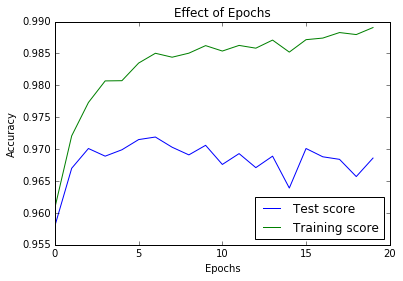

In [15]:
epochs = np.arange(20)
learning_rate = 0.077
scores_train, scores_test = [], []
nn = NeuralNetwork([784,100,10], learning_rate, random_state = 0)
indices = np.arange(X_train.shape[0])

timer.reset()
for _ in epochs:
    np.random.shuffle(indices)
    for i in indices:
        nn.fit(X_train[i], y_train_ohe[i])
    scores_train.append(nn.score(X_train, y_train))
    scores_test.append(nn.score(X_test, y_test))
    timer("test score: %f, training score: %f" % (scores_test[-1], scores_train[-1]))

plt.plot(epochs, scores_test, label = "Test score")
plt.plot(epochs, scores_train, label = "Training score")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.title("Effect of Epochs")

print("Accuracy scores")
pd.DataFrame({"epochs": epochs, "train": scores_train, "test": scores_test})

# Effect of size (num of nodes) of the single hidden layer

[0] size: 50, test score: 0.944500, training score: 0.942283, 10.59s, memory: 1583mb
[1] size: 100, test score: 0.952500, training score: 0.952617, 24.13s, memory: 1651mb
[2] size: 150, test score: 0.952900, training score: 0.955067, 36.26s, memory: 1744mb
[3] size: 200, test score: 0.955400, training score: 0.957283, 47.92s, memory: 1786mb
[4] size: 250, test score: 0.957700, training score: 0.957767, 1421.18s, memory: 1786mb
[5] size: 300, test score: 0.955100, training score: 0.957450, 137.31s, memory: 1786mb
[6] size: 350, test score: 0.956100, training score: 0.958467, 156.60s, memory: 1786mb
[7] size: 400, test score: 0.955800, training score: 0.956750, 204.31s, memory: 1786mb
[8] size: 450, test score: 0.955300, training score: 0.957833, 274.12s, memory: 1786mb
[9] size: 500, test score: 0.956200, training score: 0.957267, 339.84s, memory: 1792mb
Accuracy scores


,layer,test,train
0,50,0.9445,0.942283
1,100,0.9525,0.952617
2,150,0.9529,0.955067
3,200,0.9554,0.957283
4,250,0.9577,0.957767
5,300,0.9551,0.957450
6,350,0.9561,0.958467
7,400,0.9558,0.956750
8,450,0.9553,0.957833
9,500,0.9562,0.957267


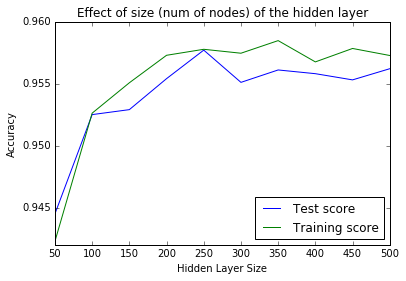

In [16]:
num_layers = 50 * (np.arange(10) + 1)
learning_rate = 0.077
scores_train, scores_test = [], []

timer.reset()
for p in num_layers:
    nn = NeuralNetwork([784, p,10], learning_rate, random_state = 0)
    indices = np.arange(X_train.shape[0])
    for i in indices:
        nn.fit(X_train[i], y_train_ohe[i])
    scores_train.append(nn.score(X_train, y_train))
    scores_test.append(nn.score(X_test, y_test))
    timer("size: %d, test score: %f, training score: %f" % (p, scores_test[-1], scores_train[-1]))

plt.plot(num_layers, scores_test, label = "Test score")
plt.plot(num_layers, scores_train, label = "Training score")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.title("Effect of size (num of nodes) of the hidden layer")

print("Accuracy scores")
pd.DataFrame({"layer": num_layers, "train": scores_train, "test": scores_test})

# Effect of using multiple hidden layers

[0] size: 1, test score: 0.952500, training score: 0.952617, 32.26s, memory: 1792mb
[1] size: 2, test score: 0.930600, training score: 0.929183, 52.31s, memory: 1792mb
[2] size: 3, test score: 0.542500, training score: 0.539083, 58.62s, memory: 1792mb
[3] size: 4, test score: 0.095800, training score: 0.098633, 62.20s, memory: 1792mb
[4] size: 5, test score: 0.095800, training score: 0.098633, 64.18s, memory: 1792mb
Accuracy scores


,layer,test,train
0,1,0.9525,0.952617
1,2,0.9306,0.929183
2,3,0.5425,0.539083
3,4,0.0958,0.098633
4,5,0.0958,0.098633


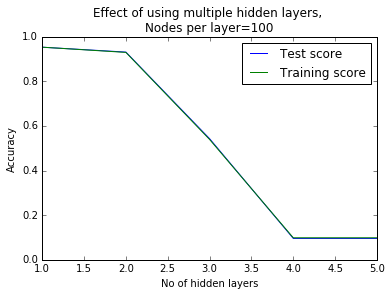

In [17]:
num_layers = np.arange(5) + 1
learning_rate = 0.077
scores_train, scores_test = [], []

timer.reset()
for p in num_layers:
    layers = [100] * p
    layers.insert(0, 784)
    layers.append(10)
    
    nn = NeuralNetwork(layers, learning_rate, random_state = 0)
    indices = np.arange(X_train.shape[0])
    for i in indices:
        nn.fit(X_train[i], y_train_ohe[i])
    scores_train.append(nn.score(X_train, y_train))
    scores_test.append(nn.score(X_test, y_test))
    timer("size: %d, test score: %f, training score: %f" % (p, scores_test[-1], scores_train[-1]))

plt.plot(num_layers, scores_test, label = "Test score")
plt.plot(num_layers, scores_train, label = "Training score")
plt.xlabel("No of hidden layers")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")
plt.title("Effect of using multiple hidden layers, \nNodes per layer=100")

print("Accuracy scores")
pd.DataFrame({"layer": num_layers, "train": scores_train, "test": scores_test})

# Rotation

(28, 28)


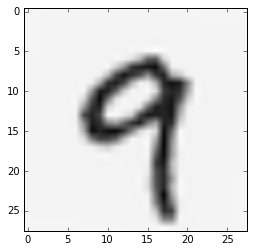

In [18]:
img = scipy.ndimage.interpolation.rotate(X_train[110].reshape(28, 28), -10, reshape=False)
print(img.shape)
plt.imshow(img, interpolation=None, cmap="Greys")

[0] test score: 0.965700, training score: 0.965917, 469.78s, memory: 1792mb
[1] test score: 0.970400, training score: 0.974217, 293.73s, memory: 1792mb
[2] test score: 0.972600, training score: 0.975783, 293.26s, memory: 1792mb
[3] test score: 0.968800, training score: 0.976300, 224.23s, memory: 1792mb
[4] test score: 0.970900, training score: 0.978750, 220.24s, memory: 1792mb
[5] test score: 0.966400, training score: 0.975817, 234.37s, memory: 1792mb
[6] test score: 0.973600, training score: 0.980567, 226.90s, memory: 1792mb
[7] test score: 0.970600, training score: 0.977233, 216.35s, memory: 1792mb
[8] test score: 0.971800, training score: 0.981417, 215.35s, memory: 1792mb
[9] test score: 0.972400, training score: 0.982817, 236.76s, memory: 1792mb
Accuracy scores


,epochs,test,train
0,0,0.9657,0.965917
1,1,0.9704,0.974217
2,2,0.9726,0.975783
3,3,0.9688,0.976300
4,4,0.9709,0.978750
5,5,0.9664,0.975817
6,6,0.9736,0.980567
7,7,0.9706,0.977233
8,8,0.9718,0.981417
9,9,0.9724,0.982817


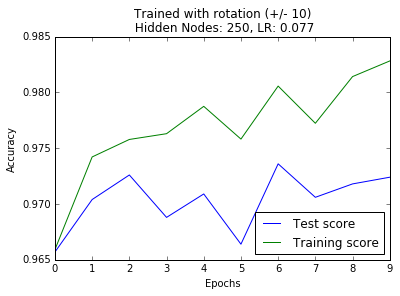

In [19]:
epochs = np.arange(10)
learning_rate = 0.077
scores_train, scores_test = [], []
nn = NeuralNetwork([784,250,10], learning_rate, random_state = 0)
indices = np.arange(X_train.shape[0])

timer.reset()
for _ in epochs:
    np.random.shuffle(indices)
    for i in indices:
        for rotation in [-10, 0, 10]:
            img = scipy.ndimage.interpolation.rotate(X_train[i].reshape(28, 28), rotation, cval=0.01, order=1, reshape=False)
            nn.fit(img.flatten(), y_train_ohe[i])
    scores_train.append(nn.score(X_train, y_train))
    scores_test.append(nn.score(X_test, y_test))
    timer("test score: %f, training score: %f" % (scores_test[-1], scores_train[-1]))

plt.plot(epochs, scores_test, label = "Test score")
plt.plot(epochs, scores_train, label = "Training score")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.title("Trained with rotation (+/- 10)\n Hidden Nodes: 250, LR: 0.077")

print("Accuracy scores")
pd.DataFrame({"epochs": epochs, "train": scores_train, "test": scores_test})

# Which charaters NN was most wrong about?

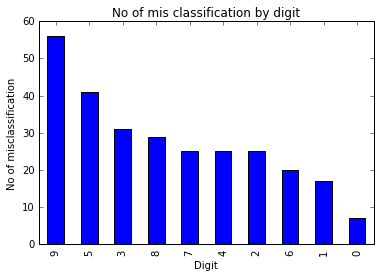

In [127]:
missed = y_test_pred != y_test
pd.Series(y_test[missed]).value_counts().plot(kind = "bar")
plt.title("No of mis classification by digit")
plt.ylabel("No of misclassification")
plt.xlabel("Digit")

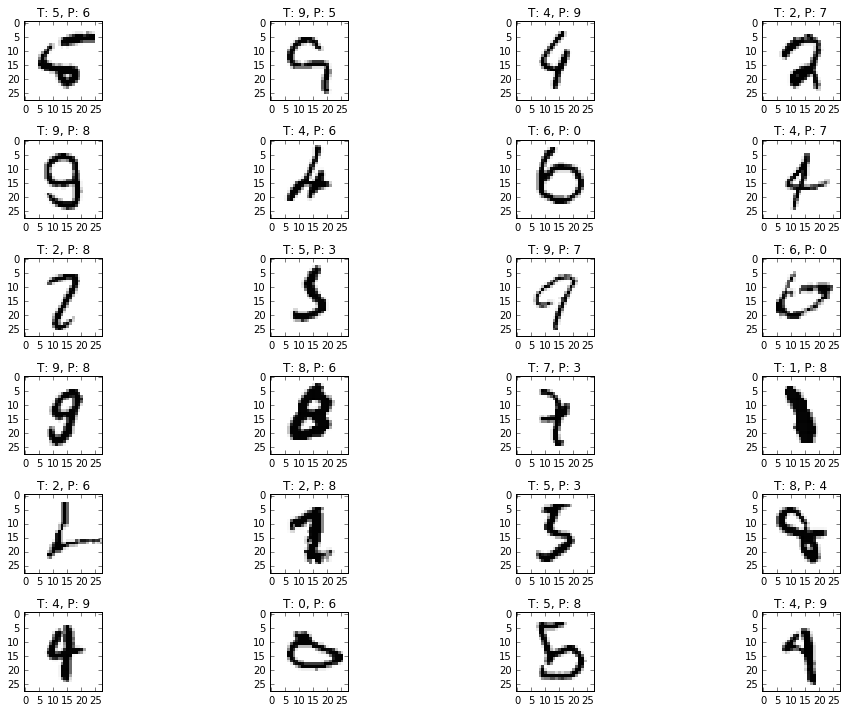

In [134]:
fig, _ = plt.subplots(6, 4, figsize = (15, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[missed][i].reshape(28, 28), interpolation="nearest", cmap="Greys")
    ax.set_title("T: %d, P: %d" % (y_test[missed][i], y_test_pred[missed][i]))
plt.tight_layout()

Original size: (82, 82)
Predicted value:  [9]


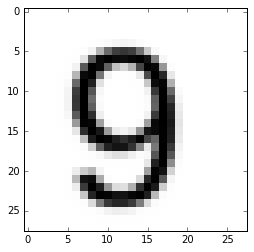

In [163]:
img = scipy.ndimage.imread("/Users/abulbasar/Downloads/9-03.png", mode="L")
print("Original size:", img.shape)
img = normalize_fetures(scipy.misc.imresize(img, (28, 28)))
img = np.abs(img - 0.99)
plt.imshow(img, cmap="Greys", interpolation="none")
print("Predicted value: ", nn.predict(img.flatten(), cls=True))